In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns 
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv("/content/NFLX.csv")

In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-24,8.265714,8.714286,8.200000,8.588571,8.588571,100060100
1,2012-10-25,8.578571,8.810000,8.557143,8.787143,8.787143,33046300
2,2012-10-26,8.792857,10.034286,8.641429,9.940000,9.940000,103433400
3,2012-10-31,9.487143,12.135714,9.364286,11.320000,11.320000,107308600
4,2012-11-01,11.121429,11.384286,10.664286,11.098571,11.098571,62669600


In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-24,8.265714,8.714286,8.200000,8.588571,8.588571,100060100
1,2012-10-25,8.578571,8.810000,8.557143,8.787143,8.787143,33046300
2,2012-10-26,8.792857,10.034286,8.641429,9.940000,9.940000,103433400
3,2012-10-31,9.487143,12.135714,9.364286,11.320000,11.320000,107308600
4,2012-11-01,11.121429,11.384286,10.664286,11.098571,11.098571,62669600
...,...,...,...,...,...,...,...
2510,2022-10-17,234.410004,249.919998,234.399994,245.100006,245.100006,21057800
2511,2022-10-18,249.800003,250.369995,237.729996,240.860001,240.860001,25776700
2512,2022-10-19,265.000000,279.299988,262.660004,272.380005,272.380005,46685300
2513,2022-10-20,272.779999,278.380005,266.380005,268.160004,268.160004,17207100


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

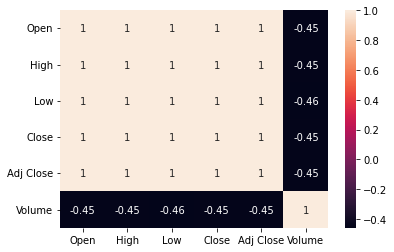

In [6]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
X = df[["Open", "High", "Low", "Close", "Volume"]]
Y = df["Adj Close"] #actual y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2012, 5)
(503, 5)
(2012,)
(503,)


In [9]:
model = XGBClassifier()

In [10]:
model.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [14]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

41.49698691285123
0.9443824490189054


In [15]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

41.80286564940083
0.9457881109394568


In [13]:
r2

0.9457881109394568